In [ ]:
# !wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip 

In [ ]:
# ! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip

In [6]:
!pip install torchvision

In [43]:
import torchvision.models as models
from PIL import Image
import pandas
from torchvision import transforms
import torch.nn as nn
import time
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import h5py
import os
import glob
torch.manual_seed(0)

In [44]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

In [45]:
class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        directory = "C:\\Users\\menam\\jupy"
        positive="Positive_tensors\\Positive_tensors"
        negative='Negative_tensors\\Negative_tensors'

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in os.listdir(positive_file_path) if file.endswith(".pt")]
        negative_files=[os.path.join(negative_file_path,file) for file in os.listdir(negative_file_path) if file.endswith(".pt")]
        number_of_samples=len(positive_files)+len(negative_files)
        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files 
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:
            self.all_files=self.all_files[0:30000]
            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:
            self.all_files=self.all_files[30000:]
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)     
       
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
               
        image=torch.load(self.all_files[idx])
        y=self.Y[idx]
                  
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y
    
print("done")

done


In [46]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
composed = transforms.Compose([transforms.Resize(224), transforms.Normalize(mean, std)])
train_dataset = Dataset(transform=composed, train=True)
validation_dataset = Dataset(transform=composed, train=False)
print("done")

done


Loading pretrained model

In [47]:
model = models.resnet18(pretrained= True)

Setting the attribute requires_grad to False to make the parameters not effected by traning


In [48]:
model.requires_grad_(False)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [49]:
model.fc = nn.Linear(in_features=512, out_features=2)

In [50]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Training the Model


In [51]:
crirerion = nn.CrossEntropyLoss()

In [52]:
train_loader = DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=100)

In [53]:
optimizer = torch.optim.Adam([parameters  for parameters in model.parameters() if parameters.requires_grad],lr=0.001)

**Training the data**
it took about 45 min.


In [54]:
n_epochs=1
loss_list=[]
accuracy_list=[]
accuracy_for_epochs=[]
correct=0
accuracy = 0.0
N_test=len(validation_dataset)
N_train=len(train_dataset)
start_time = time.time()

Loss=0
start_time = time.time()
for epoch in range(n_epochs):
    for x, y in train_loader:
        model.train() 
        optimizer.zero_grad()
        z = model(x) # model prediction
        loss = crirerion(z,y)
        loss.backward()
        # update parameters 
        optimizer.step()
        loss_list.append(loss.data)
        
    correct=0
    for x_test, y_test in validation_loader:
        # set model to eval 
        model.eval()
        z_test = model(x_test)
        #find max 
        _, yhat_test = torch.max(z_test.data, 1)   
        correct += (yhat_test == y_test).sum().item()

    
    accuracy=correct/N_test
    accuracy_list.append(accuracy)



C:\Users\menam\AppData\Local\Temp\ipykernel_67748\1898060484.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image=torch.load(self.all_files[idx])


# Printing the accuracy and loss iterations


In [55]:
accuracy

0.9942

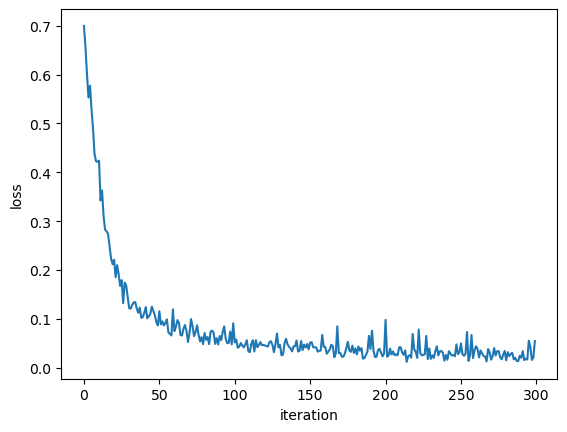

In [56]:
plt.plot(loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()


# Printing the first 4 misclassified samples 

C:\Users\menam\AppData\Local\Temp\ipykernel_67748\1898060484.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image=torch.load(self.all_files[idx])


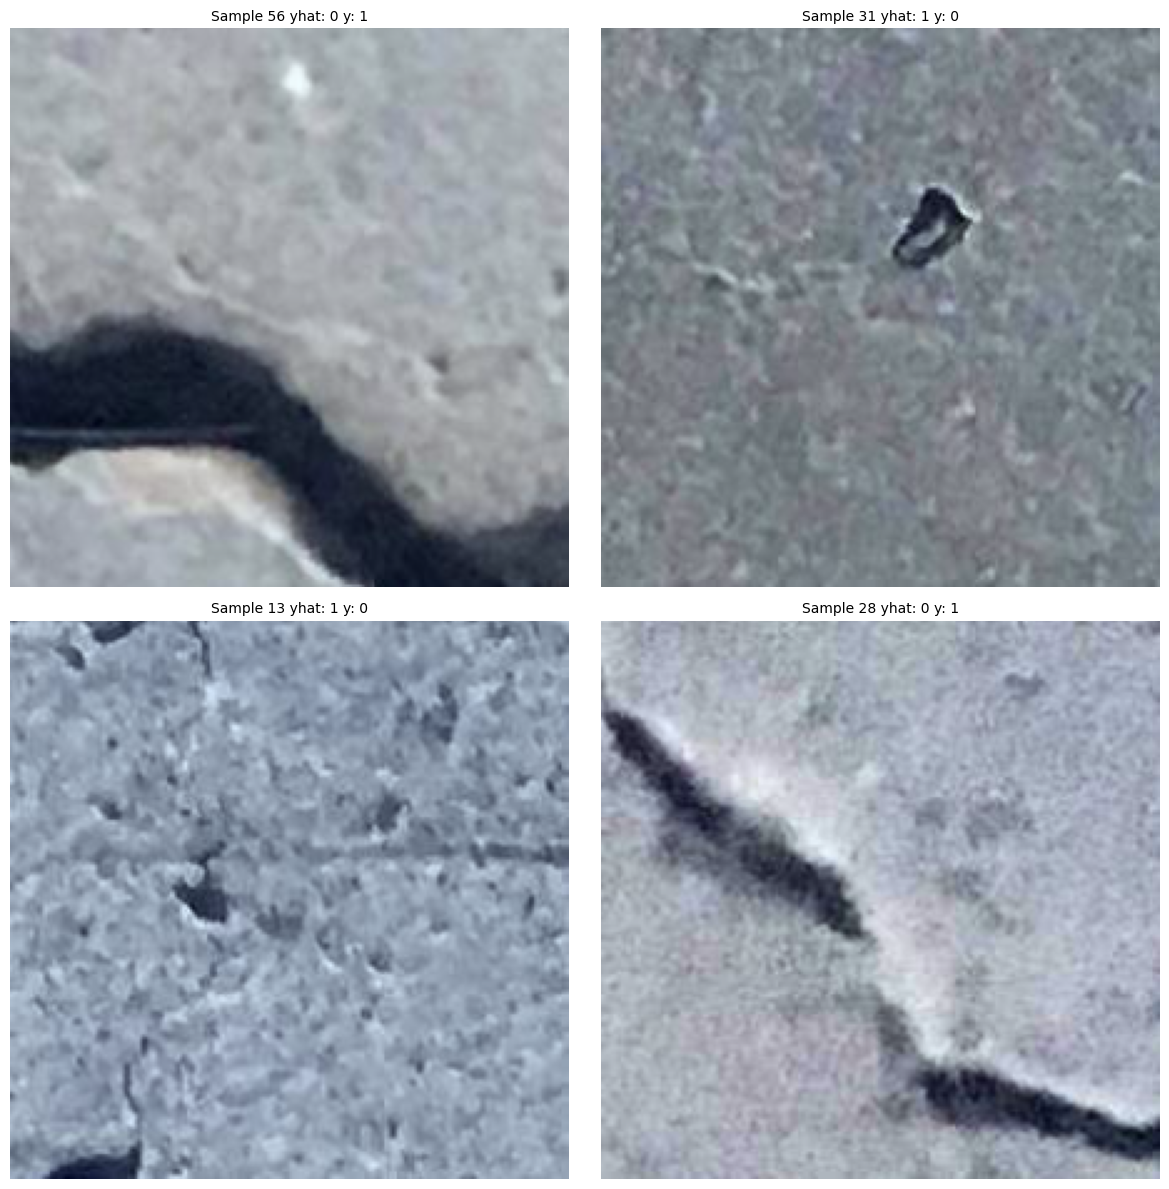

In [57]:
import matplotlib.pyplot as plt
import torch

# Define a transform to ensure images are in the right format
def convert_to_displayable(tensor):
    # Check if the tensor has 1 or 3 channels and reshape if needed
    if tensor.shape[0] == 1:
        tensor = tensor.expand(3, -1, -1)  # Convert single channel to 3 channels (grayscale to RGB)
    
    # Normalize to range 0-1
    tensor = tensor.clone()  # Avoid modifying the original tensor
    tensor = tensor - tensor.min()
    tensor = tensor / tensor.max()
    
    return tensor.permute(1, 2, 0)  # Rearrange to [H, W, C] format for display

count = 0
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Create a 2x2 grid for displaying images
axs = axs.flatten()  # Flatten the 2x2 grid to easily iterate over it

for x, y in validation_loader:
    z = model(x)
    _, yhat = torch.max(z, 1)
    
    # Compare yhat and y element-wise
    incorrect = yhat != y
    
    if incorrect.any():
        # Find the first incorrect prediction in the batch
        idx = incorrect.nonzero(as_tuple=True)[0][0].item()
        
        # Select the tensor and convert to displayable format
        image_tensor = x[idx].cpu()  # Move the tensor to CPU if necessary
        image_tensor = convert_to_displayable(image_tensor)
        
        # Display the image in the appropriate subplot
        axs[count].imshow(image_tensor)
        axs[count].set_title(f"Sample {idx} yhat: {yhat[idx].item()} y: {y[idx].item()}", fontsize=10)
        axs[count].axis('off')  # Hide axes for better visualization
        
        count += 1
        if count >= 4:
            break

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
